<a href="https://colab.research.google.com/github/AndreeAguilar/Actividad_4/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo excel desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
data2=pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx') 

In [ ]:
# Aplicamos filtro por columnas para separar datos cuantitativos y datos cualitativos 50,52 61,62
filtro_cuantitativos_2=data2.iloc[ : , [5,6,13,14,16,21,22,29,31,33,42,58,59,60,90]]
filtro_cualitativos_2=data2.iloc[ : , [0,1,2,3,4,7,8,9,10,11,12,15,17,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,51,53,54,55,56,57,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,88,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104]]

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
filtro_cuantitativos_2=filtro_cuantitativos_2.fillna(round(filtro_cuantitativos_2.mean(),1))

In [ ]:
#Corroboramos valores nulos de los datos cuantitativos
valores_nulos=filtro_cuantitativos_2.isnull().sum()
valores_nulos

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtro_cuantitativos_2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr=filtro_cuantitativos_2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]

In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr=filtro_cuantitativos_2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))

In [ ]:
#Reemplazamos valores nulos restantez del dataframe con "bfill" y "ffill"
filtro_cualitativos_2=filtro_cualitativos_2.fillna(method="bfill") 
filtro_cualitativos_2=filtro_cualitativos_2.fillna(method="ffill") 

In [ ]:
#Corroboramos valores nulos cualitativos
valores_nulos=filtro_cualitativos_2.isnull().sum()
valores_nulos

In [ ]:
# Unimos los datos cuantitativos y los datos cualitativos
Datos_limpios_microretailer_mit_lift_lab = pd.concat([filtro_cualitativos_2, data5_iqr], axis=1)

**Regresión lineal múltiple**

In [ ]:
#Cargar archivo csv desde seaborn
df=Datos_limpios_microretailer_mit_lift_lab
df.head(5)

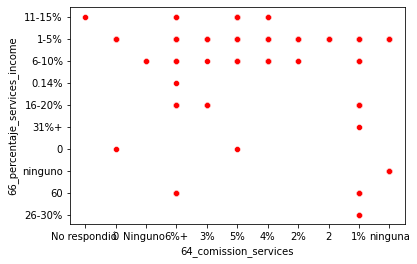

In [ ]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='64_comission_services', y='66_percentaje_services_income', color='red', data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep=df[['66_percentaje_services_income']]
Var_Dep=df['64_comission_services']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verficamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 determinación
model.score(Vars_Indep, Var_Dep)

Regresión logistica

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística. Nota: Las variables independientes solo pueden ser númericas
Vars_Indep=df['2_current_permanent_employees']
Vars_Dep=df['20_reviews_finances_monthly']

In [ ]:
#Redefinimos las variables
X=Vars_Indep
y=Vars_Dep

In [ ]:
#Definimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan los datos
escalar=StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()